In [31]:
%matplotlib inline
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

if os.name == 'nt':
    sep = '\\'
else:
    sep = '/'

In [7]:
data_dir = '../input'
os.listdir(data_dir)

['jpeg',
 'sample_submission.csv',
 'test',
 'test.csv',
 'tfrecords',
 'train',
 'train.csv']

In [8]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

---
## Train

In [9]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

In [10]:
pdp.ProfileReport(train)

---
## Test

In [11]:
pdp.ProfileReport(test)

---
## Image

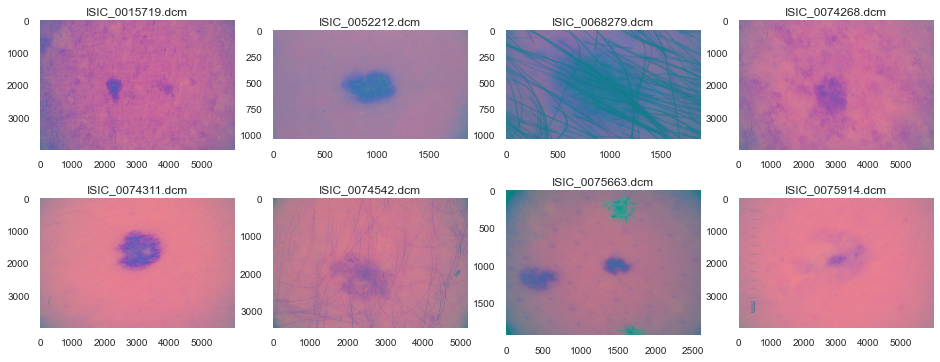

In [25]:
# .dcm
import pydicom

img_path = glob.glob(os.path.join(data_dir, 'train', '*.dcm'))
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16, 6))

for i, ax in enumerate(axes.ravel()):
    d = pydicom.dcmread(img_path[i])
    img_name = img_path[i].split(sep)[-1]
    ax.imshow(d.pixel_array)
    ax.set_title(img_name)
plt.show()

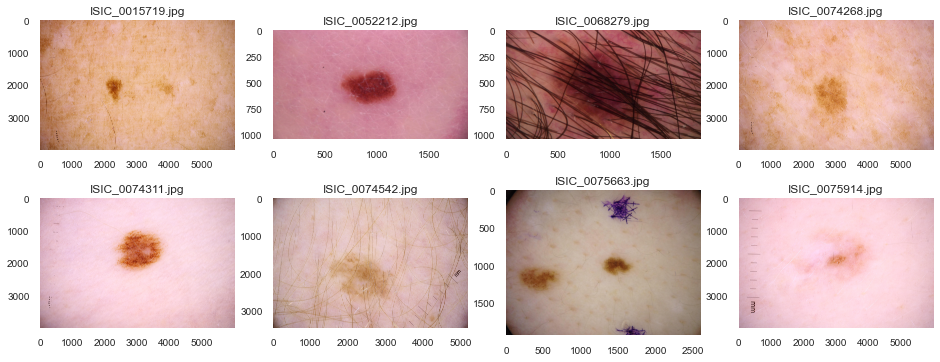

In [34]:
# .jpg
img_path = glob.glob(os.path.join(data_dir, 'jpeg', 'train', '*.jpg'))
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16, 6))

for i, ax in enumerate(axes.ravel()):
    d = cv2.imread(img_path[i])
    d = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
    img_name = img_path[i].split(sep)[-1]
    ax.imshow(d)
    ax.set_title(img_name)
plt.show()

In [35]:
tar_name = [img_path[i].split(sep)[-1].split('.')[0] for i in range(8)]
train[train['image_name'].isin(tar_name)]

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   
5  ISIC_0074311  IP_2950485  female        40.0               lower extremity   
6  ISIC_0074542  IP_4698288    male        25.0               lower extremity   
7  ISIC_0075663  IP_6017204  female        35.0                         torso   
8  ISIC_0075914  IP_7622888    male        30.0                         torso   

  diagnosis benign_malignant  target  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  
5   unknown           benign       0  
6   unknown           benign       0  
7   unknown           benign       0  
8   unknown           benign       0

benign:  ['ISIC_8795038', 'ISIC_7154859', 'ISIC_1636931', 'ISIC_1643439']
malignant:  ['ISIC_9547725', 'ISIC_1684127', 'ISIC_3775417', 'ISIC_4425322']


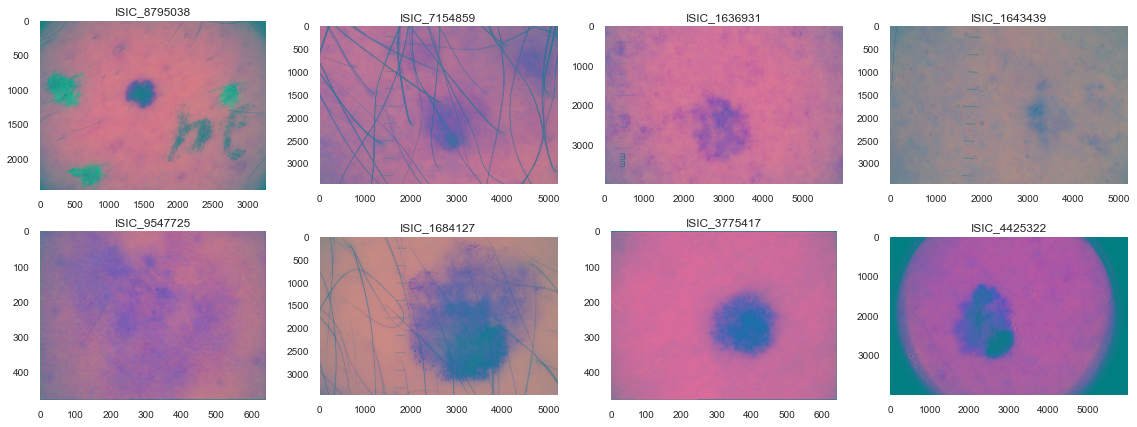

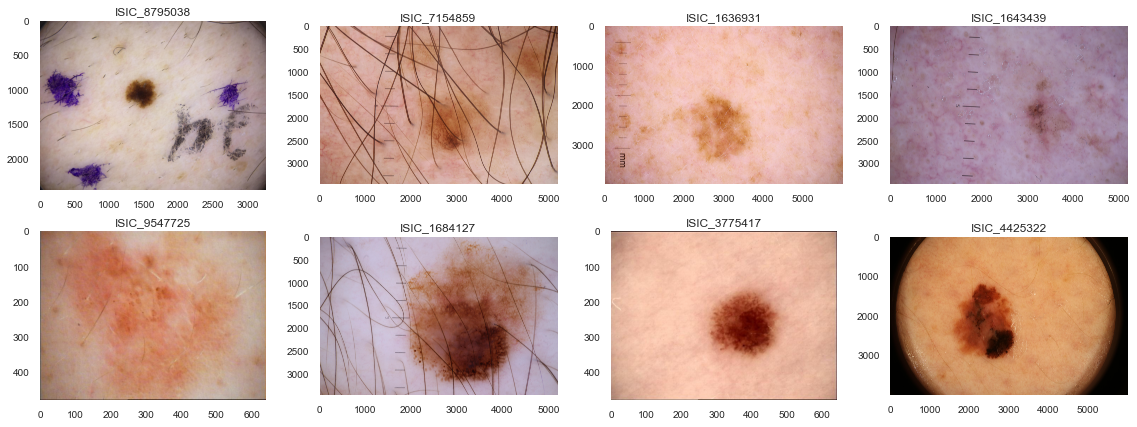

In [53]:
# benign vs malignant
benign_list = train[train['benign_malignant'] == 'benign'].sample(frac=1.0)['image_name'][:4].tolist()
malignant_list = train[train['benign_malignant'] == 'malignant'].sample(frac=1.0)['image_name'][:4].tolist()

tar_list = benign_list + malignant_list

print('benign: ', benign_list)
print('malignant: ', malignant_list)

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16, 6))

for i, ax in enumerate(axes.ravel()):
    img_path = os.path.join(data_dir, 'train', tar_list[i] + '.dcm')
    
    d = pydicom.dcmread(img_path)
    ax.imshow(d.pixel_array)
    ax.set_title(tar_list[i])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16, 6))

for i, ax in enumerate(axes.ravel()):
    img_path = os.path.join(data_dir, 'jpeg', 'train', tar_list[i] + '.jpg')
    
    d = cv2.imread(img_path)
    d = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
    ax.imshow(d)
    ax.set_title(tar_list[i])
plt.tight_layout()
plt.show()

In [107]:
# # 画像サイズの調査
img_path = glob.glob(os.path.join(data_dir, 'train', '*.dcm'))
# shape_list = []
# for i in range(len(img_path)):
#     d = pydicom.dcmread(img_path[i])
#     d = d.pixel_array
#     shape_list.append(str(d.shape))

In [108]:
len(img_path)

33126

---
## Data Augmentation

In [91]:
import albumentations as albu

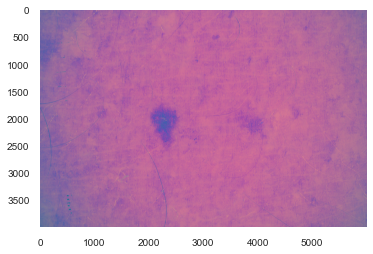

In [92]:
img = pydicom.dcmread(img_path[0])
img = img.pixel_array

plt.imshow(img)
plt.show()

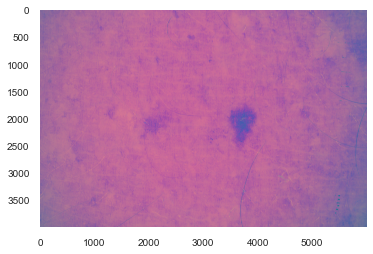

In [93]:
img_augmented = albu.HorizontalFlip(p=1)(image=img)['image']
plt.imshow(img_augmented)
plt.show()

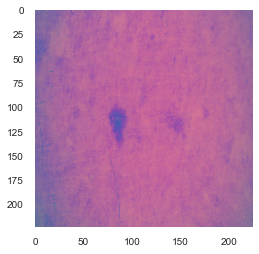

In [103]:
img_augmented = albu.Resize(224, 224, p=1)(image=img)['image']
img_augmented = albu.CenterCrop(224, 224, p=1)(image=img_augmented)['image']
plt.imshow(img_augmented)
plt.show()

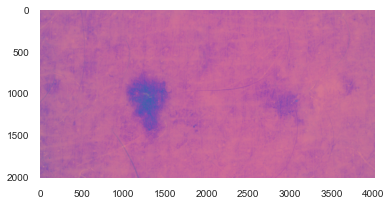

In [98]:
img_augmented = albu.CenterCrop(height=2024, width=4024, p=1)(image=img)['image']
plt.imshow(img_augmented)
plt.show()

In [104]:
img_path[:5]

['../input\\train\\ISIC_0015719.dcm',
 '../input\\train\\ISIC_0052212.dcm',
 '../input\\train\\ISIC_0068279.dcm',
 '../input\\train\\ISIC_0074268.dcm',
 '../input\\train\\ISIC_0074311.dcm']

In [109]:
tar = 'ISIC_0068279'

a = [path for path in img_path if tar in path][0]

In [110]:
a

'../input\\train\\ISIC_0068279.dcm'